# Chapter 3 Programming 

In [1]:
import numpy as np

In [3]:
def convert(C):
    F = 9/5*C + 32
    return F


In [4]:
convert(25)

77.0

In [27]:
# Fibonacci series , f(n) = f(n-1) + f(n-2)
# 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, ...
def fib1(n):
    f1, f2 = 0, 1
    k=1
    print(f2, end=', ')        
    while 1:
        k += 1 # k = k + 1
        f1, f2 = f2, f1+f2
        print(f2, end=', ')        
        if k == n:
            return f2
        
fib1(8)        

1, 1, 2, 3, 5, 8, 13, 21, 

21

In [30]:
def fib2(n): # 재귀함수, recursion
#     print(n)
    if n <= 1: 
        return n
    return fib2(n-1) + fib2(n-2)

fib2(8)

21

In [31]:
def future_value(p, i, n):
    """
    Calculate future value of n years investment 
    input :
        p : initial principal
        i : annual interest
        n : numberof years
    output :
        f : future return    
    """
    for k in range(n):
        p = p*(1+i)
    return p

future_value(100, 0.05, 10)

162.8894626777442

In [35]:
import numpy as np

def freefall(t, m=68.1, cd=0.25):
    """
    freefall : bungee velocity with second-order drag
    input : 
        t = time (s)
        m = mass (kg), default 68.1
        cd = drag coefficient (m/s), default = 0.25    
    output :
        v = velocity (m/s)    
    """
    g = 9.81
    v = np.sqrt(g * m / cd) * np.tanh(np.sqrt(g * cd / m) * t)
    return v

In [33]:
t = 12
# v = freefall(12)
v = freefall(t, m=80, cd=0.2)
v

59.78698843813102

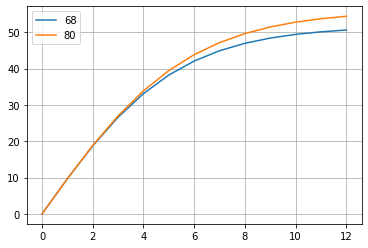

In [40]:
t = np.linspace(0, 12, 13)
for m in [68, 80]:
    v = freefall(t, m=m)
    plt.plot(t, v, label=m)
plt.legend()
plt.grid()
plt.show()
    

## nesting structure

In [5]:
def quadroots(a, b, c): # a x^2 + b x + c = 0 , x = (-b +- sqrt(b^2 - 4*a*c))/(2a)
    if a == 0:
        if b != 0:
            r = - c / b
            return r
        else:
            print('trivial solution')
    else:
        d = b**2 - 4*a*c
        if d >= 0:
            r1 = (-b + np.sqrt(d)) / (2*a)
            r2 = (-b - np.sqrt(d)) / (2*a)
            return r1, r2            
        else:
            r = -b / (2*a)
            i = np.sqrt(np.abs(d)) / (2*a)
            return r + i*1j, r - i*1j

In [6]:
quadroots(1,1,1)

((-0.5+0.8660254037844386j), (-0.5-0.8660254037844386j))

In [43]:
quadroots(1,5,1)

(-0.20871215252208009, -4.7912878474779195)

### Anonymous function

In [46]:
fun = lambda x, y: x**2 + y**2
print( fun(2,3) )

def fun1(x, y):
    return x**2 + y**2

print( fun(2, 3),  )

13
13


### gcd

In [47]:
def gcd(a, b):
    """최대공약수(greatest common divisor)"""
#     print(a, b)
    while (b != 0):
        a, b = b, a % b
#         print(a, b)
    return a
gcd(23*3, 23*25)

69 575
575 69
69 23
23 0


23

In [8]:
def gcd1(a, b):  # recurssion
    print(a,b)
    if b == 0:
        return a
    else:
        return gcd1(b, a%b)
gcd1(23*3, 23*25)

69 575
575 69
69 23
23 0


23

### prime factor

In [10]:
def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
#         print(i, n)
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors    

prime_factors(612) # 612 = 17*6*6

[2, 2, 3, 3, 17]

In [13]:
def trial_division(n):
    a = []
    while n % 2 == 0:
        a.append(2)
        n //= 2
    f = 3
    while f * f <= n:
        if n % f == 0:
            a.append(f)
            n //= f
        else:
            f += 2
    if n != 1: a.append(n)
    # Only odd number is possible
    return a

In [16]:
trial_division(124)

[2, 2, 31]

### prime number

In [17]:
import numpy as np
def prime_sieve(n):
    """ 
    Wikipedia  
    
    Sieve of Eratosthenes
    
    algorithm Sieve of Eratosthenes is
    input: an integer n > 1.
    output: all prime numbers from 2 through n.

    let A be an array of Boolean values, indexed by integers 2 to n,
    initially all set to true.
    
    for i = 2, 3, 4, ..., not exceeding √n do
        if A[i] is true
            for j = i2, i2+i, i2+2i, i2+3i, ..., not exceeding n do
                A[j] := false

    return all i such that A[i] is true.
    """
    A = [True]*(n)
    res = np.arange(n)
    A[0] = A[1] = False
    n2 = np.int(np.sqrt(n)) + 1
    print(n2)
    for k in range(2, n2):        
        if A[k] == True:
            for j in range(k*k, n, k):
                if A[j] == True:
                    A[j] = False    
            print(k, res[A])
    return res[A]

prime_sieve(50)

8
2 [ 2  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]
3 [ 2  3  5  7 11 13 17 19 23 25 29 31 35 37 41 43 47 49]
5 [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 49]
7 [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47]


array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47])

### Sort

In [49]:
def bubble_sort(a):
    n = len(a)
    for i in range(n-1):
        for j in range(i+1, n):
            if a[i] > a[j]:
                a[i], a[j] = a[j], a[i] # swap
    return a
    
def quick_sort(a):
    n = len(a)
    if n <= 1:
        return a
    pivot = a[n//2]
    left   = [x for x in a if x < pivot]
    middle = [x for x in a if x == pivot]
    right  = [x for x in a if x > pivot]
    return quick_sort(left) + middle + quick_sort(right) # list concatenation

a = [3,6,8,10,1,2,1]
a = bubble_sort(a)
print(a)

a = [3,6,8,10,1,2,1]
a = quick_sort(a)
print(a)

a = [3,6,8,10,1,2,1]
a.sort() # Sort an array in-place
print( a )

a = np.array([3,6,8,10,1,2,1])
a.sort() # Sort an array in-place
print(a)

[1, 1, 2, 3, 6, 8, 10]
[1, 1, 2, 3, 6, 8, 10]
[1, 1, 2, 3, 6, 8, 10]
[ 1  1  2  3  6  8 10]


### Bisection method 
Find a root $ e^{-x} = x$ , $0 < x < 1$

        0.00000        2.50000        5.00000
        0.00000        1.25000        2.50000
        0.00000        0.62500        1.25000
        0.00000        0.31250        0.62500
        0.31250        0.46875        0.62500
        0.46875        0.54688        0.62500
        0.54688        0.58594        0.62500
        0.54688        0.56641        0.58594
        0.56641        0.57617        0.58594
        0.56641        0.57129        0.57617
        0.56641        0.56885        0.57129
        0.56641        0.56763        0.56885
        0.56641        0.56702        0.56763
        0.56702        0.56732        0.56763
        0.56702        0.56717        0.56732
        0.56702        0.56709        0.56717
        0.56709        0.56713        0.56717
        0.56713        0.56715        0.56717
        0.56713        0.56714        0.56715
        0.56714        0.56715        0.56715
        0.56714        0.56714        0.56715
        0.56714        0.56714    

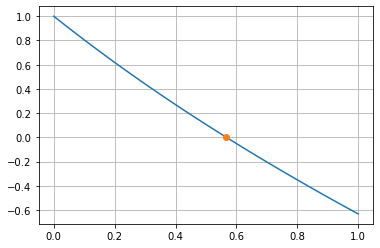

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def bisection(fun, a, b, tol=1e-6):
    fa = fun(a)
    fb = fun(b)
    while 1:        
        c = (a + b)/2
        print('{:15.5f}{:15.5f}{:15.5f}'.format(a, c, b))
        fc = fun(c)
        if fa*fc > 0:
            a, fa = c, fc
        else:
            b, fb = c, fc
        if np.abs(a-b) < tol:
            return a
def fun(x):
    return np.exp(-x) - x        

x = np.linspace(0, 1)
plt.plot(x, fun(x))
plt.grid()

x = bisection(fun, 0, 5)
print(x)  
plt.plot([x], [0], 'o')
plt.show()

Evaluate 

$$\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots$$

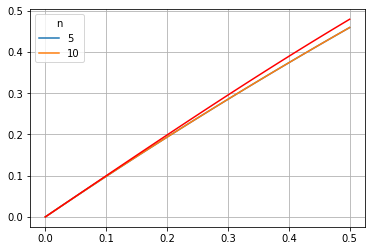

In [20]:
n = 15
a = np.zeros(n+2)

a[1] = 1
k = 1
f = 1
sign = 1
for i in range(n):
    k = k+1
    f = f*(2*k-1)*(2*k-2)
    sign = -1*sign
    a[k] = sign/f
    
x = np.linspace(0, 0.5, 100)
y = np.empty_like(x)

for nn in [5, 10]:
    p = a[nn]
    for i in reversed(range(nn - 1)):
        p = a[i] + x*p
    plt.plot(x, p, label=nn)
plt.plot(x, np.sin(x), 'r')
plt.legend(title='n')
plt.grid()
plt.show()
    
    

In [21]:
def factorial_1(n):
    if n == 0:  
        return 1
    f = 1
    for i in range(1, n+1):
        f = f*i
    return f

def factorial_2(n):  
    if n == 0: 
        return 1
    else: 
        return n*factorial_2(n-1)

def factorial_3(n):  
    return np.arange(1, n+1).prod()
    

print("{:>5s}{:>15s}{:>15s}".format('n', 'e_t', 'e_r'))    
p = 1
for n in range(3, 15, 2):
    a = np.zeros(n)
    s = 1
    for i in range(1, n, 2):
        a[i] = s/factorial_2(i)
        s = -s
    
    pold = p
    
    x = np.pi/2    
    p = a[-1]
    for i in reversed(range(n - 1)):
        p = a[i] + x*p
    
    e_t = np.abs(p - np.sin(x))
    e_r = np.abs(p-pold)/np.abs(p)
    print("{:5d}{:15.5e}{:15.5e}".format(n, e_t, e_r))

    n            e_t            e_r
    3    5.70796e-01    3.63380e-01
    5    7.51678e-02    6.98466e-01
    7    4.52486e-03    7.93337e-02
    9    1.56899e-04    4.68249e-03
   11    3.54258e-06    1.60441e-04
   13    5.62589e-08    3.59884e-06


### divide and average
Calculate the square root of a positive number
$$x = \sqrt{a}$$
$$x = \frac{x + a / x}{2}$$ 

In [54]:
def square_root(a, tol=1e-6):
    x = a/2.0    
    while 1:
        xold = x
        x = (x + a/x)/2.0
        if np.abs(x-xold) < tol: 
            return x
        
        
        
#         print("{:5d}{:15.6f}{:15.6e}{:15.6e}".format(k, x, xold-x, x-np.sqrt(2)))
#         if np.abs(x-xold) < tol*np.abs(x):
#             return x, k

In [55]:
square_root(3)

1.7320508075688772